In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
%matplotlib inline

In [4]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [5]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

## Load cell ids and scores

In [6]:
runs = range(564,596+1)

In [7]:
histogram = np.zeros((len(runs),500))
for i,run in enumerate(runs[:]):
    try:
        with sparse.Run(path_to_data + "r%04d.h5" %run) as r:
            cells = r.cellIds
            score = r.litpixel
        goodcells = np.ones(len(cells), dtype=np.bool)
        goodcells[cells == 0] = False
        if run <= 577:
            goodcells[cells >= 142] = False
        if score is not None:
            histogram[i], centers = np.histogram(score[goodcells], range=(0,1000), bins=500, density=True)
    except:
        pass

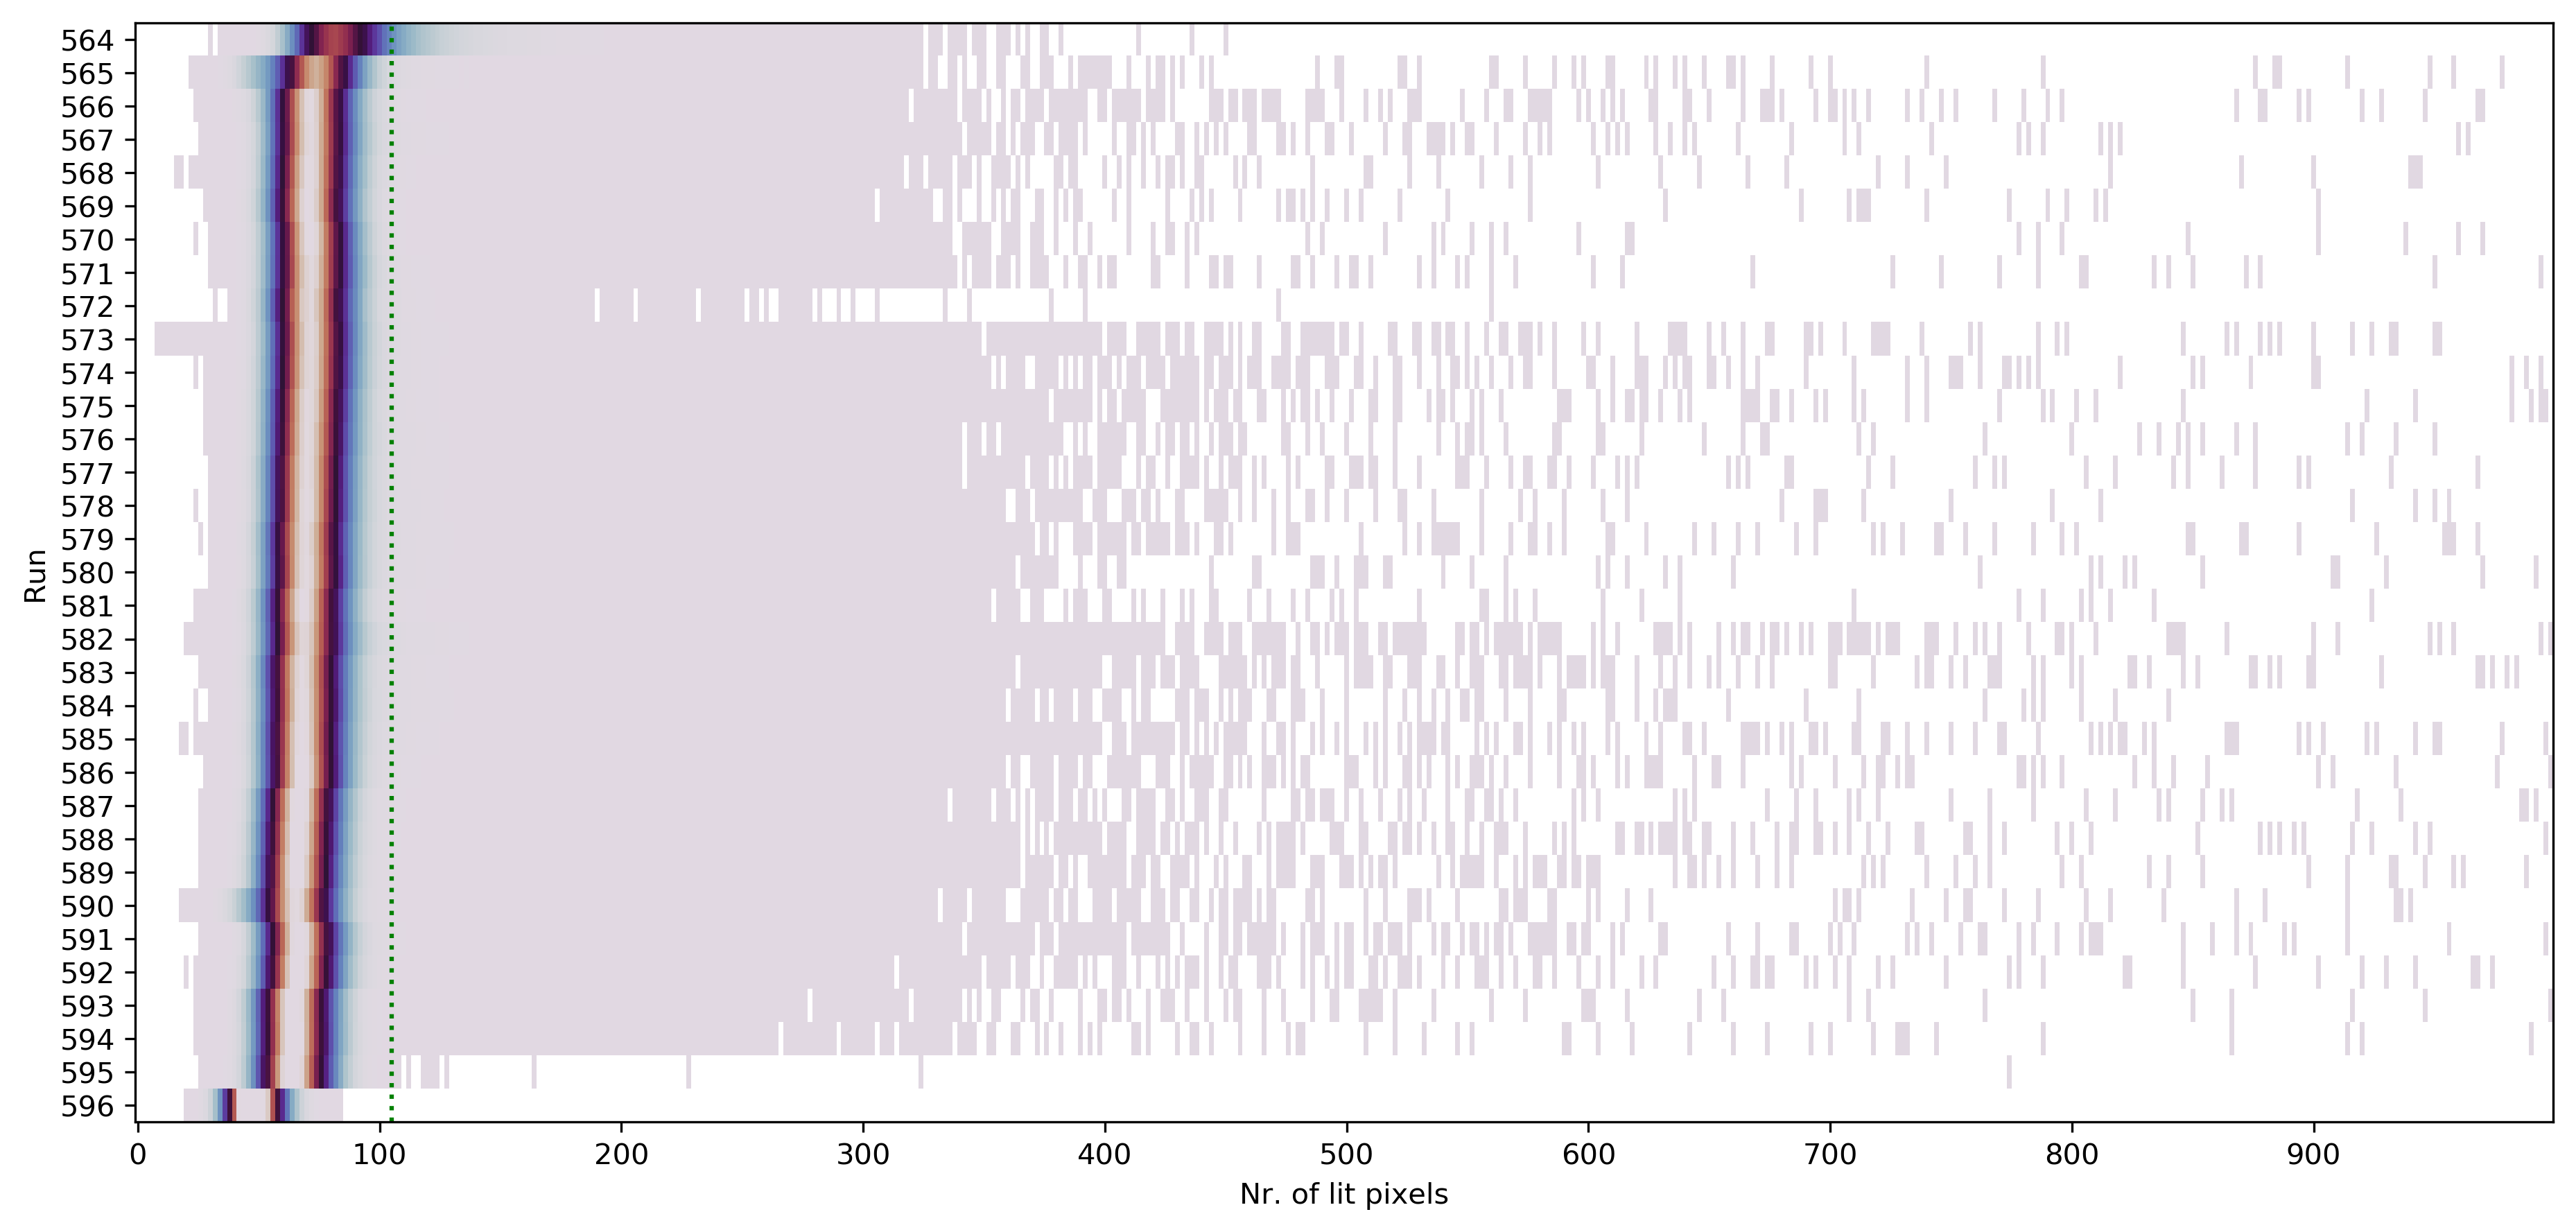

In [8]:
mimg = np.ma.masked_array(histogram, mask=histogram==0)
cmap = cm.get_cmap('twilight')
cmap.set_bad('1.0')
plt.figure(figsize=(15,7), dpi=300)
plt.imshow(mimg, aspect='auto', vmin=0, vmax=.04, cmap=cmap)
plt.yticks(range(len(runs)), labels=runs)
plt.xticks(range(500)[::50], labels=range(1000)[::100])
plt.axvline(105/2., ls=':', color='g')
plt.xlabel("Nr. of lit pixels")
plt.ylabel("Run")
plt.savefig("../../plots/litpixels.png", bbox_inches='tight')
plt.show()